## 安裝套件

In [1]:
!pip install requests

In [2]:
!pip install feedparser

In [3]:
!pip install lxml

In [4]:
!pip install jieba

### 下載繁體字的辭典檔

In [5]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

--2022-11-06 16:46:26--  https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big [following]
--2022-11-06 16:46:26--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘jieba_data/dict.txt.big’

jieba_data/dict.txt 100%[===================>]   8.18M  3.37MB/s    in 2.4s    

2022-11-06 16:46:29 (3.37 MB/s) - ‘jieba_data/dict.txt.big’ saved [8583143/8583143]



In [6]:
!pip install wordcloud

## 解析 RSS

In [7]:
import feedparser

In [8]:
#rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [9]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money"

In [10]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': False,
 'entries': [{'title': '伊朗稱試射衛星運載火箭 美國：此舉破壞穩定',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '伊朗稱試射衛星運載火箭 美國：此舉破壞穩定'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/5599/6743925'}],
   'link': 'https://money.udn.com/money/story/5599/6743925',
   'published': 'Sun, 06 Nov 2022 16:21:50 +0800',
   'published_parsed': time.struct_time(tm_year=2022, tm_mon=11, tm_mday=6, tm_hour=8, tm_min=21, tm_sec=50, tm_wday=6, tm_yday=310, tm_isdst=0),
   'summary': '伊朗國家通訊社報導，伊朗革命衛隊（Revolutionary Guards）今天測試了新的攜帶衛星火箭。美國指稱此舉「沒...',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '伊朗國家通訊社報導，伊朗革命衛隊（Revolutionary Guards）今天測試了新的攜帶衛星火箭。美國指稱此舉「沒...'},
   'id': 'https://money.udn.com/money/story/5599/6743925',
   'guidislink':

### 查看每個 entry 的 title, url 

In [11]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 伊朗稱試射衛星運載火箭 美國：此舉破壞穩定, https://money.udn.com/money/story/5599/6743925
2, 越南暗黑料理鴨仔蛋  傳說吃完踩碎殼能轉運, https://money.udn.com/money/story/5599/6743927
3, 破世界紀錄512億彩金 美連槓39期威力球獎號出爐, https://money.udn.com/money/story/5599/6743923
4, 大阪驚見未爆彈！暫撤離3750人 自衛隊耗時30分鐘拆除, https://money.udn.com/money/story/5599/6743919
5, 日本規模最大道教宮廟在埼玉 十足台灣味, https://money.udn.com/money/story/5599/6743912
6, 美國費城槍擊案至少9人受傷 兩人情況危急, https://money.udn.com/money/story/5599/6743892
7, 加拿大關注台海 曾厚仁稱台灣有難將損加國利益, https://money.udn.com/money/story/5599/6743880
8, 日本國際海上閱兵登場 岸田登艦再度譴責北韓, https://money.udn.com/money/story/5599/6743871
9, 通膨太高爭加薪 英國護理師工會通過全國大罷工, https://money.udn.com/money/story/5599/6743841
10, 秘魯數千人湧入首都街頭 要求涉貪總統下台, https://money.udn.com/money/story/5599/6743785
11, 歐洲徹查海外警局 異議人士：中國騷擾手段何其多, https://money.udn.com/money/story/5599/6743784
12, 蒙特婁攝氏23度 創加拿大史上11月最高溫, https://money.udn.com/money/story/5599/6743786
13, 伊波拉疫情擴散 烏干達兩重災區封鎖延長, https://money.udn.com/money/story/5599/6743737
14, 英相蘇納克將出席COP27 籲全球領袖擺脫化石燃料, https:/

### 解析html可以參考 https://lxml.de/lxmlhtml.html

## 開始取得文章

### 載入 library

In [12]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

### 使用繁體辭典

In [13]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

### 設定 request header

In [14]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

### 先爬文

In [15]:
#分解動作

#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/5599/6743925
sleep time: 7 sec
https://money.udn.com/money/story/5599/6743927
sleep time: 5 sec
https://money.udn.com/money/story/5599/6743923
sleep time: 5 sec
https://money.udn.com/money/story/5599/6743919
sleep time: 4 sec
https://money.udn.com/money/story/5599/6743912
sleep time: 8 sec
https://money.udn.com/money/story/5599/6743892
sleep time: 3 sec
https://money.udn.com/money/story/5599/6743880
sleep time: 9 sec
https://money.udn.com/money/story/5599/6743871
sleep time: 10 sec
https://money.udn.com/money/story/5599/6743841
sleep time: 9 sec
https://money.udn.com/money/story/5599/6743785
sleep time: 7 sec
https://money.udn.com/money/story/5599/6743784
sleep time: 9 sec
https://money.udn.com/money/story/5599/6743786
sleep time: 3 sec
https://money.udn.com/money/story/5599/6743737
sleep time: 4 sec
https://money.udn.com/money/story/5599/6743653
sleep time: 6 sec
https://money.udn.com/money/story/5599/6743631
sleep time: 10 sec
https://money.udn.com/m

'伊朗國家通訊社報導，伊朗革命衛隊（Revolutionary Guards）今天測試了新的攜帶衛星火箭。美國指稱此舉「沒有益處且破壞穩定」。路透社報導，華府擔心伊朗將衛星送入軌道的遠程彈道技術，也可用於發射核彈頭。德黑蘭則一直否認有此意圖。伊朗通訊社（IRNA）報導：「使用固體燃料發動機的衛星運載火箭…成功完成飛行測試。」伊朗通訊社表示，伊朗首枚三級發射載具「加埃姆」（Ghaem）100型火箭，能夠將重達80公斤的衛星放置在距離地球表面500公里的軌道上。這家官方通訊社報導，負責研發「加埃姆」100型的伊朗革命衛隊航空部隊司令哈吉薩達（AmiraliHajizadeh）表示，這枚火箭將為通訊部（telecommunications ministry）把衛星「金星號」（Nahid）送入軌道。美國國務院發言人以電郵回復有關伊朗聲明內容時表示：「這種行動並無助益，且破壞穩定。」這位發言人說：「對伊朗繼續發展太空發射載具（SLV），美國仍感憂心，這構成了嚴重的（核）擴散問題。」他表示：「太空發射載具所採納的技術，與遠程系統等彈道飛彈的技術，實際上相同且可互換。」這位官員說，試射太空發射載具違反了聯合國安理會第2231號決議，其內容呼籲伊朗不要進行任何與能夠運載核武器的彈道飛彈有關的活動，包括使用這類彈道飛彈技術的發射測試。這位發言人又說，華府將「繼續使用制裁等各種防止（核）擴散的手段，以對抗伊朗彈道飛彈計畫進一步發展，及伊朗向其他國家擴散飛彈和相關技術的能力」。特派專欄（中央社記者陳家倫河內6日專電）越南暗黑料理「鴨仔蛋」在食用時可以看見小鴨胚胎令許多國際旅客聞之喪膽；而在當地民眾眼裡，「鴨仔蛋」不僅味美價廉還能驅邪，據說只要吃完後將鴨蛋殼踩碎就能趕走厄運。多次被國際旅客票選為世界上最恐怖菜餚之一的「鴨仔蛋」在北越地區被叫做Trung Vit Lon，南越地區則稱它為Hot Vit Lon，字面意思就是倒置的鴨蛋。越南人愛吃「鴨仔蛋」，普及程度隨便在路邊攤、餐廳裡都可以點得到。「鴨仔蛋」並非越南特產，在菲律賓、柬埔寨甚至是中國南方省市都有吃「鴨仔蛋」的食俗，但在越南的吃法五花八門，可以簡單地用椰子水煮熟，也有人會把「鴨仔蛋」剝殼後炒奶油、蒜頭甚至鹽焗等。記者外派越南兩年多以來，迄今與「鴨仔蛋」交手過2次。第一次是初來乍到仍看不懂越文時在河內市住處附近誤點了一碗「鴨仔蛋」米

### 做分詞

In [16]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from /home/jovyan/work/Text_wordcloud/jieba_data/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u240ff8c1e70462be159af457c3f6d652.cache
Loading model cost 5.379 seconds.
Prefix dict has been built successfully.


['伊朗',
 '國家',
 '通訊社',
 '報導',
 '，',
 '伊朗',
 '革命',
 '衛隊',
 '（',
 'Revolutionary',
 ' ',
 'Guards',
 '）',
 '今天',
 '測試',
 '了',
 '新',
 '的',
 '攜帶',
 '衛星',
 '火箭',
 '。',
 '美國',
 '指稱',
 '此舉',
 '「',
 '沒有',
 '益處',
 '且',
 '破壞',
 '穩定',
 '」',
 '。',
 '路透社',
 '報導',
 '，',
 '華府',
 '擔心',
 '伊朗',
 '將',
 '衛星',
 '送入',
 '軌道',
 '的',
 '遠程',
 '彈道',
 '技術',
 '，',
 '也',
 '可',
 '用於',
 '發射',
 '核彈頭',
 '。',
 '德黑蘭',
 '則',
 '一直',
 '否認',
 '有',
 '此',
 '意圖',
 '。',
 '伊朗',
 '通訊社',
 '（',
 'IRNA',
 '）',
 '報導',
 '：',
 '「',
 '使用',
 '固體燃料',
 '發動機',
 '的',
 '衛星',
 '運載火箭',
 '…',
 '成功',
 '完成',
 '飛行',
 '測試',
 '。',
 '」',
 '伊朗',
 '通訊社',
 '表示',
 '，',
 '伊朗',
 '首枚',
 '三級',
 '發射',
 '載具',
 '「',
 '加埃姆',
 '」',
 '（',
 'Ghaem',
 '）',
 '100',
 '型',
 '火箭',
 '，',
 '能夠',
 '將重',
 '達',
 '80',
 '公斤',
 '的',
 '衛星',
 '放置',
 '在',
 '距離',
 '地球表面',
 '500',
 '公里',
 '的',
 '軌道',
 '上',
 '。',
 '這家',
 '官方',
 '通訊社',
 '報導',
 '，',
 '負責',
 '研發',
 '「',
 '加埃姆',
 '」',
 '100',
 '型',
 '的',
 '伊朗',
 '革命',
 '衛隊',
 '航空',
 '部隊',
 '司令',
 '哈',
 '吉薩',
 '達',
 '（',
 'AmiraliHajizadeh'

In [17]:
!ls jieba_data

dict.txt.big  mydict.txt  stop_words.txt


### 準備 stop word

In [18]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '(',
 ')',
 '[',
 ']',
 '《',
 '》',
 '；',
 '『',
 '』',
 '：',
 ' ',
 '’',
 '（',
 '）',
 '、',
 '」',
 '「',
 '。',
 '，',
 '在',
 '他',
 '日',
 '對',
 '不',
 '她',
 '為',
 '也',
 '會',
 '等',
 '已',
 '從',
 '自己',
 '認為',
 '但',
 '說',
 '第',
 '上',
 '將',
 '到',
 '月',
 '人',
 '中',
 '時']

### 準備一個利用stop word過濾後的分詞結果

In [19]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['伊朗',
 '國家',
 '通訊社',
 '報導',
 '伊朗',
 '革命',
 '衛隊',
 'Revolutionary',
 'Guards',
 '今天',
 '測試',
 '新',
 '攜帶',
 '衛星',
 '火箭',
 '美國',
 '指稱',
 '此舉',
 '益處',
 '且',
 '破壞',
 '穩定',
 '路透社',
 '報導',
 '華府',
 '擔心',
 '伊朗',
 '衛星',
 '送入',
 '軌道',
 '遠程',
 '彈道',
 '技術',
 '可',
 '用於',
 '發射',
 '核彈頭',
 '德黑蘭',
 '則',
 '一直',
 '否認',
 '有',
 '此',
 '意圖',
 '伊朗',
 '通訊社',
 'IRNA',
 '報導',
 '使用',
 '固體燃料',
 '發動機',
 '衛星',
 '運載火箭',
 '…',
 '成功',
 '完成',
 '飛行',
 '測試',
 '伊朗',
 '通訊社',
 '表示',
 '伊朗',
 '首枚',
 '三級',
 '發射',
 '載具',
 '加埃姆',
 'Ghaem',
 '100',
 '型',
 '火箭',
 '能夠',
 '將重',
 '達',
 '80',
 '公斤',
 '衛星',
 '放置',
 '距離',
 '地球表面',
 '500',
 '公里',
 '軌道',
 '這家',
 '官方',
 '通訊社',
 '報導',
 '負責',
 '研發',
 '加埃姆',
 '100',
 '型',
 '伊朗',
 '革命',
 '衛隊',
 '航空',
 '部隊',
 '司令',
 '哈',
 '吉薩',
 '達',
 'AmiraliHajizadeh',
 '表示',
 '這枚',
 '火箭',
 '將為',
 '通訊部',
 'telecommunications',
 'ministry',
 '把',
 '衛星',
 '金星',
 '號',
 'Nahid',
 '送入',
 '軌道',
 '美國國務院',
 '發言人',
 '以',
 '電郵',
 '回',
 '復',
 '有關',
 '伊朗',
 '聲明',
 '內容',
 '表示',
 '這種',
 '行動',
 '並無',
 '助益',
 '且',
 '破壞',
 '穩定

### 載入繪圖相關的 library

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

/opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc


### 繪製文字雲 ( wordcloud.generate )

In [21]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [22]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'伊朗': 24,
         '國家': 9,
         '通訊社': 6,
         '報導': 22,
         '，': 480,
         '革命': 2,
         '衛隊': 2,
         '（': 78,
         'Revolutionary': 1,
         ' ': 70,
         'Guards': 1,
         '）': 78,
         '今天': 18,
         '測試': 3,
         '了': 20,
         '新': 9,
         '的': 264,
         '攜帶': 1,
         '衛星': 5,
         '火箭': 3,
         '。': 240,
         '美國': 19,
         '指稱': 1,
         '此舉': 1,
         '「': 139,
         '沒有': 9,
         '益處': 1,
         '且': 10,
         '破壞': 3,
         '穩定': 4,
         '」': 138,
         '路透社': 6,
         '華府': 2,
         '擔心': 1,
         '將': 16,
         '送入': 2,
         '軌道': 3,
         '遠程': 2,
         '彈道': 1,
         '技術': 5,
         '也': 23,
         '可': 7,
         '用於': 1,
         '發射': 6,
         '核彈頭': 1,
         '德黑蘭': 2,
         '則': 3,
         '一直': 2,
         '否認': 3,
         '有': 28,
         '此': 2,
         '意圖': 1,
         'IRNA': 2,
         '：': 23,
  

In [23]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

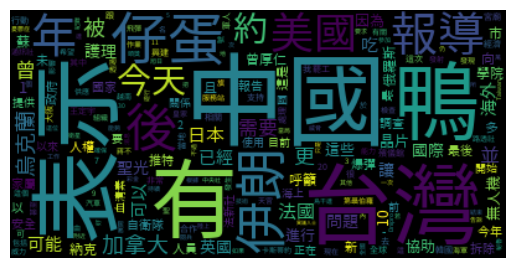

In [24]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()